## Table of Contents

1. [Introduction](#introduction)

2. [Importing Modules](#importing-modules)

3. [Read Data from CSV](#read-data)

4. [Correlation Matrix](#correlation-matrix)

5. [Ammount and Duration of Loans](#ammount-duration-loans)

6. [Payments and Ammount of Loans](#payments-ammount-loan)

7. [Ammount of Loan and Last Balance on Account](#ammount-last-balance)

8. [Inter-Quartile Balance per Account and Last account Balance Relation](#inter-quartile-balance)

10. [Loan Ammount Statistics](#loan-ammount)

11. [Transactions Statistics](#transactions-statistics)

12. [Histograms Observations](#histograms-observations)

## Introduction <a class="anchor" id="introduction"></a>

## Importing Modules <a class="anchor" id="importing-modules"></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import KBinsDiscretizer

## Read Data from CSV <a class="anchor" id="read-data"></a>

In [2]:
df = pd.read_csv("./preprocessed/mergedTrainData.csv")

## Correlation Matrix <a class="anchor" id="correlation-matrix"></a>

We created a correlation matrix in order to identify redundant attributes. The greater the correlation coeficient between a pair of attributes is the more dependent those attributes are of each other. One of those attributes can be dropped since it can be derived from the other. 

<AxesSubplot:>

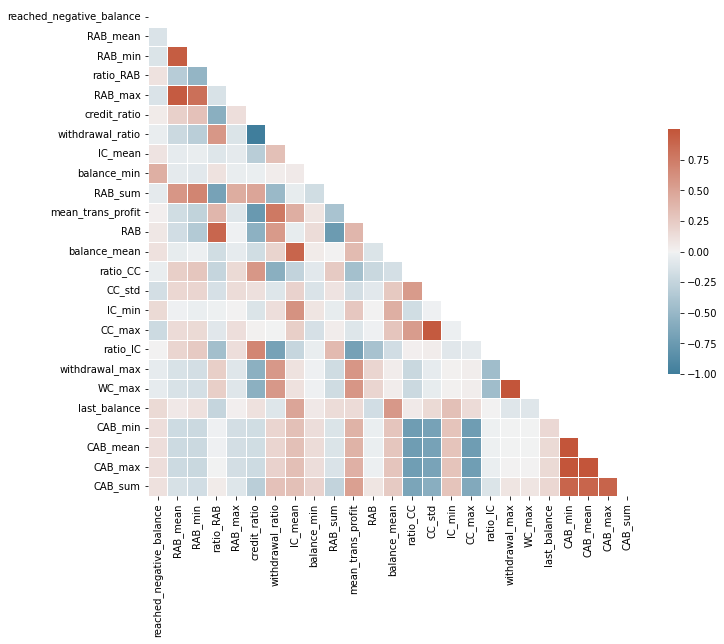

In [3]:
# Best features returned previously by the Feature Selection algorithm. 
best_features = [
    'reached_negative_balance', 'RAB_mean', 'RAB_min', 'ratio_RAB', 'RAB_max', 'credit_ratio', 'withdrawal_ratio',
    'IC_mean', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'RAB', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max',
    'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_min', 'CAB_mean', 'CAB_max', 'CAB_sum'
]

corr = df[best_features].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Looking at the correlation matrix of the best features (according to our feature selection algorithm), we can see that the following columns have a high correlation:
- RAB_mean and RAB_min (we're going to remove the RAB_min column)
- RAB_mean and RAB_max (we're going to remove the RAB_max column)
- ratio_RAB and RAB (we're going to remove the RAB)
- withdrawal_ration and mean_trans_profit (we're going to remove the withdrawal_ration)
- IC_mean and balance_mean (we're going to remove the IC_mean)
- RAB_sum and RAB (we're going to remove the RAB, as we said previously)
- CAB_min and ratio_CC (we're going to remove the CAB_min)
- CAB_min and CAB_max (we're going to remove CAB_min, as we said previously)
- CAB_max and CAB_sum (we're going to remove CAB_max)
- CAB_mean and CAB_sum (we're going to remove CAB_sum)

In [4]:
features_to_remove = ['RAB_min', 'RAB_max', 'RAB', 'withdrawal_ratio', 'IC_mean', 'CAB_min', 'CAB_max', 'CAB_sum']
selected_features = list(filter(lambda x: x not in features_to_remove, best_features))
print(selected_features)

['reached_negative_balance', 'RAB_mean', 'ratio_RAB', 'credit_ratio', 'balance_min', 'RAB_sum', 'mean_trans_profit', 'balance_mean', 'ratio_CC', 'CC_std', 'IC_min', 'CC_max', 'ratio_IC', 'withdrawal_max', 'WC_max', 'last_balance', 'CAB_mean']


## Ammount and Duration of Loans <a class="anchor" id="ammount-duration-loans"></a>

From this plot, we can say that normally a high-duration loan means a high-ammount loan. The opposite is also true, a low-duration loan tipically means a low-ammount loan. 

<AxesSubplot:xlabel='duration', ylabel='amount'>

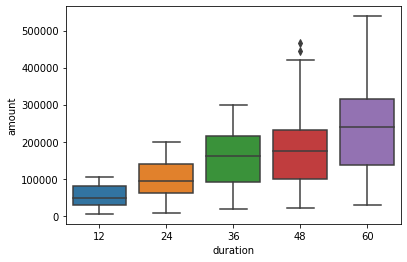

In [5]:
sns.boxplot(x="duration", y="amount", data=df)

## Payments and Ammount of Loan <a class="anchor" id="payments-ammount-loan"></a>
Looking at the following plot, it is visible the correlation between the payments and the ammount of a loan. Normally the higher the ammount of the loan, also higher the payments will be.

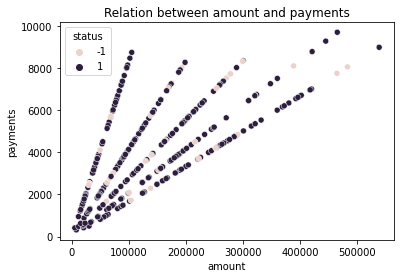

In [6]:
def scatterplot_graph(df, col1, col2, title, col_hue=None):
  if col_hue != None:
    sns.scatterplot(data=df, x=df[col1], y=df[col2], hue=col_hue).set_title(title)
  else:
    sns.scatterplot(data=df, x=df[col1], y=df[col2]).set_title(title)

loan_train_data = pd.read_csv("./files/loan_train.csv", sep=";")
scatterplot_graph(df=loan_train_data, col1="amount", col2="payments", title="Relation between amount and payments", col_hue="status")


## Ammount of Loan and Last Balance on Account <a class="anchor" id="ammount-last-balance"></a>

Clients with lower (last) balances on their accounts are more prone to ask for a loan and normally loans with a lower ammount.

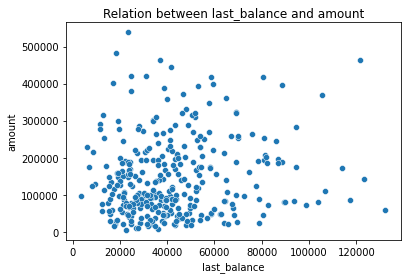

In [7]:
scatterplot_graph(df=df, col1="last_balance", col2="amount", title="Relation between last_balance and amount")

## Inter-Quartile Balance per Account and Last account Balance Relation <a class="anchor" id="inter-quartile-balance"></a>

On the next plot, we can see the relation between the inter-quartile balance of an account and the respective last balance for the same account.

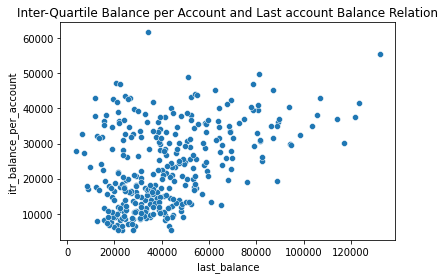

In [8]:
merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
scatterplot_graph(df=merged_data_train, col1="last_balance", col2="itr_balance_per_account", title="Inter-Quartile Balance per Account and Last account Balance Relation")

## Loan Ammount Statistics <a class="anchor" id="loan-ammount"></a>

We now look into some statistics and observations about the loan ammounts.

### Loan Train Data

We start by computing the mean and standard deviation and other statistics measures for the loan's ammount for years 1993 to 1996 for the train data.

In [10]:
loan_train_data = pd.read_csv("./preprocessed/loan_train_data.csv", index_col=0)

amount_means = []
amount_stds = []

loan_years = [28, 27, 26, 25, 24]
print("----- Loan Train Data -----")
for year in loan_years:
  loan_data_year = loan_train_data[['amount']].loc[loan_train_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2021 - year))
  amount_means.append(loan_data_year.describe()['amount']['mean'])
  amount_stds.append(loan_data_year.describe()['amount']['std'])
  print(loan_data_year.describe()['amount'][['mean', 'std']])
  print("\n")

----- Loan Train Data -----
Statistics for year: 1993
mean    142287.529412
std     107310.422764
Name: amount, dtype: float64


Statistics for year: 1994
mean    126671.510204
std      81622.307034
Name: amount, dtype: float64


Statistics for year: 1995
mean    148253.869565
std     119465.007096
Name: amount, dtype: float64


Statistics for year: 1996
mean    159630.358974
std     110518.943223
Name: amount, dtype: float64


Statistics for year: 1997
mean    128106.000000
std      72813.400415
Name: amount, dtype: float64




### Loan Test Data

We also compute the mean and standard deviation for the loan's ammount for years 1997 to 1998 for the test data.

In [11]:
loan_test_data = pd.read_csv("./preprocessed/loan_test_data.csv", index_col=0)
loan_years = [24, 23]

print("----- Loan Test Data -----")
for year in loan_years:
  loan_data_year = loan_test_data[['years_since_loan', 'amount']].loc[loan_test_data['years_since_loan'] == year]
  print("Statistics for year: " + str(2021 - year))

  calculated_mean = loan_data_year.describe()['amount']['mean']
  calculated_std = loan_data_year.describe()['amount']['std']
  if year == 24:
    amount_means[-1] = (amount_means[-1] + calculated_mean) / 2
    amount_stds[-1] = (amount_stds[-1] + calculated_std) / 2
  else:
    amount_means.append(calculated_mean)
    amount_stds.append(loan_data_year.describe()['amount']['std'])

  print(loan_data_year.describe()['amount'][['mean', 'std']])
  print("\n")

----- Loan Test Data -----
Statistics for year: 1997
mean    153682.630435
std     122444.799235
Name: amount, dtype: float64


Statistics for year: 1998
mean    160722.988235
std     118155.102402
Name: amount, dtype: float64




### Insights about the Loan Ammounts

Through the gathering of statistics about loans, namely the mean, standard deviation, minimum and maximum amounts of loans for every year in the train and test datasets we conclude there was a huge variation in the standard deviation of amounts between 1993, 1994 and 1995 in the train dataset. This loan amounts were getting more spread out through the years. In 1996 and 1997 the spreading decreased but it was still high when comparing to 1993 and 1994. 

It's also important to note that through the years the average loan amount was growing when observing the train a test datasets independently. This clearly demonstrates that people were asking more and more for loans.

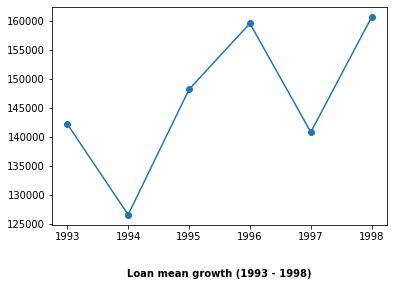

In [12]:
# Train data - Growing mean (1993 - 1998)
train_years = ["1993", "1994", "1995", "1996", "1997", "1998"]
plt.scatter(train_years, amount_means)
plt.plot(train_years, amount_means)
plt.xlabel("\n\nLoan mean growth (1993 - 1998)", fontdict={"weight": "bold"})
plt.show()

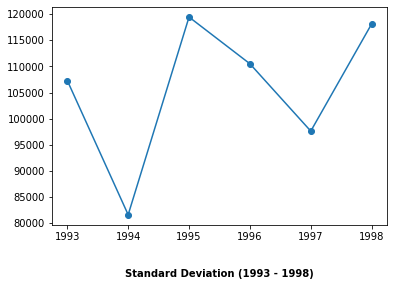

In [13]:
# Train data - Standar Deviation (1993 - 1998)
train_years = ["1993", "1994", "1995", "1996", "1997", "1998"]
plt.scatter(train_years, amount_stds)
plt.plot(train_years, amount_stds)
plt.xlabel("\n\nStandard Deviation (1993 - 1998)", fontdict={"weight": "bold"})
plt.show()

## Transactions Statistics <a class="anchor" id="transactions-statistics"></a>

We now look into some statistics about the transactions data.

In [14]:
def trans_stats(df):
  credit_df = df.loc[df["type"] == "credit"]['amount']
  withdrawal_df = df.loc[df["type"] == "withdrawal"]['amount']

  credit_count = credit_df.describe()['count']
  credit_mean = credit_df.describe()['mean']

  withdrawal_count = withdrawal_df.describe()['count']
  withdrawal_mean = withdrawal_df.describe()['mean']

  return [credit_count, credit_mean, withdrawal_count, withdrawal_mean]

In [15]:
trans_train_data = pd.read_csv("./files/trans_train.csv", sep=";")
[credit_count, credit_mean, withdrawal_count, withdrawal_mean] = trans_stats(trans_train_data)

/Users/davidferreira/Library/Python/3.8/lib/python/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


### Credit and Withdrawal Transactions Count

With the next plot we can see that there were less Credit transactions (money entering in the account) compared to Withdrawal ones (money exiting the account) almost in a 1:2 relation.

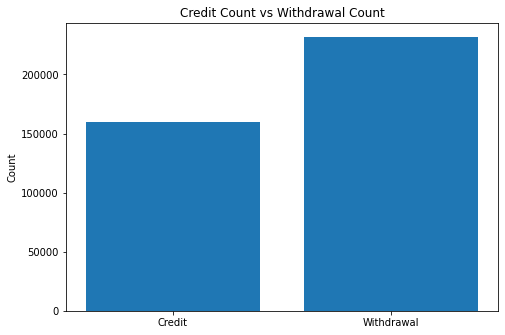

In [16]:
algorithms = ("Credit", "Withdrawal")

values = [credit_count, withdrawal_count]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algorithms, values)
plt.title("Credit Count vs Withdrawal Count")
plt.ylabel("Count")
plt.show()

### Credit and Withdrawal Transactions Ammount Mean

But with this plot we can see that the mean of the credit ammounts is higher than the mean of the withdrawal ammounts almos in a 2:1 relation.

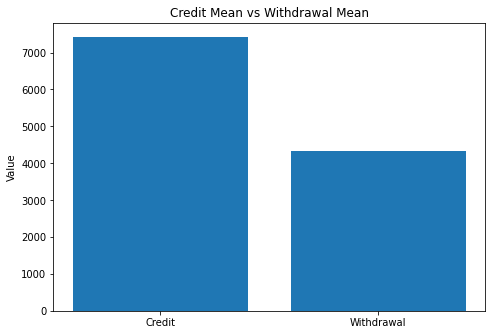

In [17]:
algorithms = ("Credit", "Withdrawal")

values = [credit_mean, withdrawal_mean]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(algorithms, values)
plt.title("Credit Mean vs Withdrawal Mean")
plt.ylabel("Value")
plt.show()

With this observations we can attest some reliability on the Transactions data. 

Even though the number of withdrawals here higher than the number of credits, the ammount of those withdrawalls was smaller than the ammount of the credit. If the second observation was not true, it would mean that the clients were going bankrupt.

Also, the standard deviation of credits is higher for credits than for withdrawals meaning that credit values are more spread out concerning the mean. 

## Histograms Observations <a class="anchor" id="histograms-observations"></a>

On the next image, we can observe many histograms representing the count of many features and it's relation with the loan status. We can see this for:
- Account balance mean.
- Last balance on account.
- Loan's ammount.
- Entrepreneurs ratio.
- Gender.
- Criminality growth. 

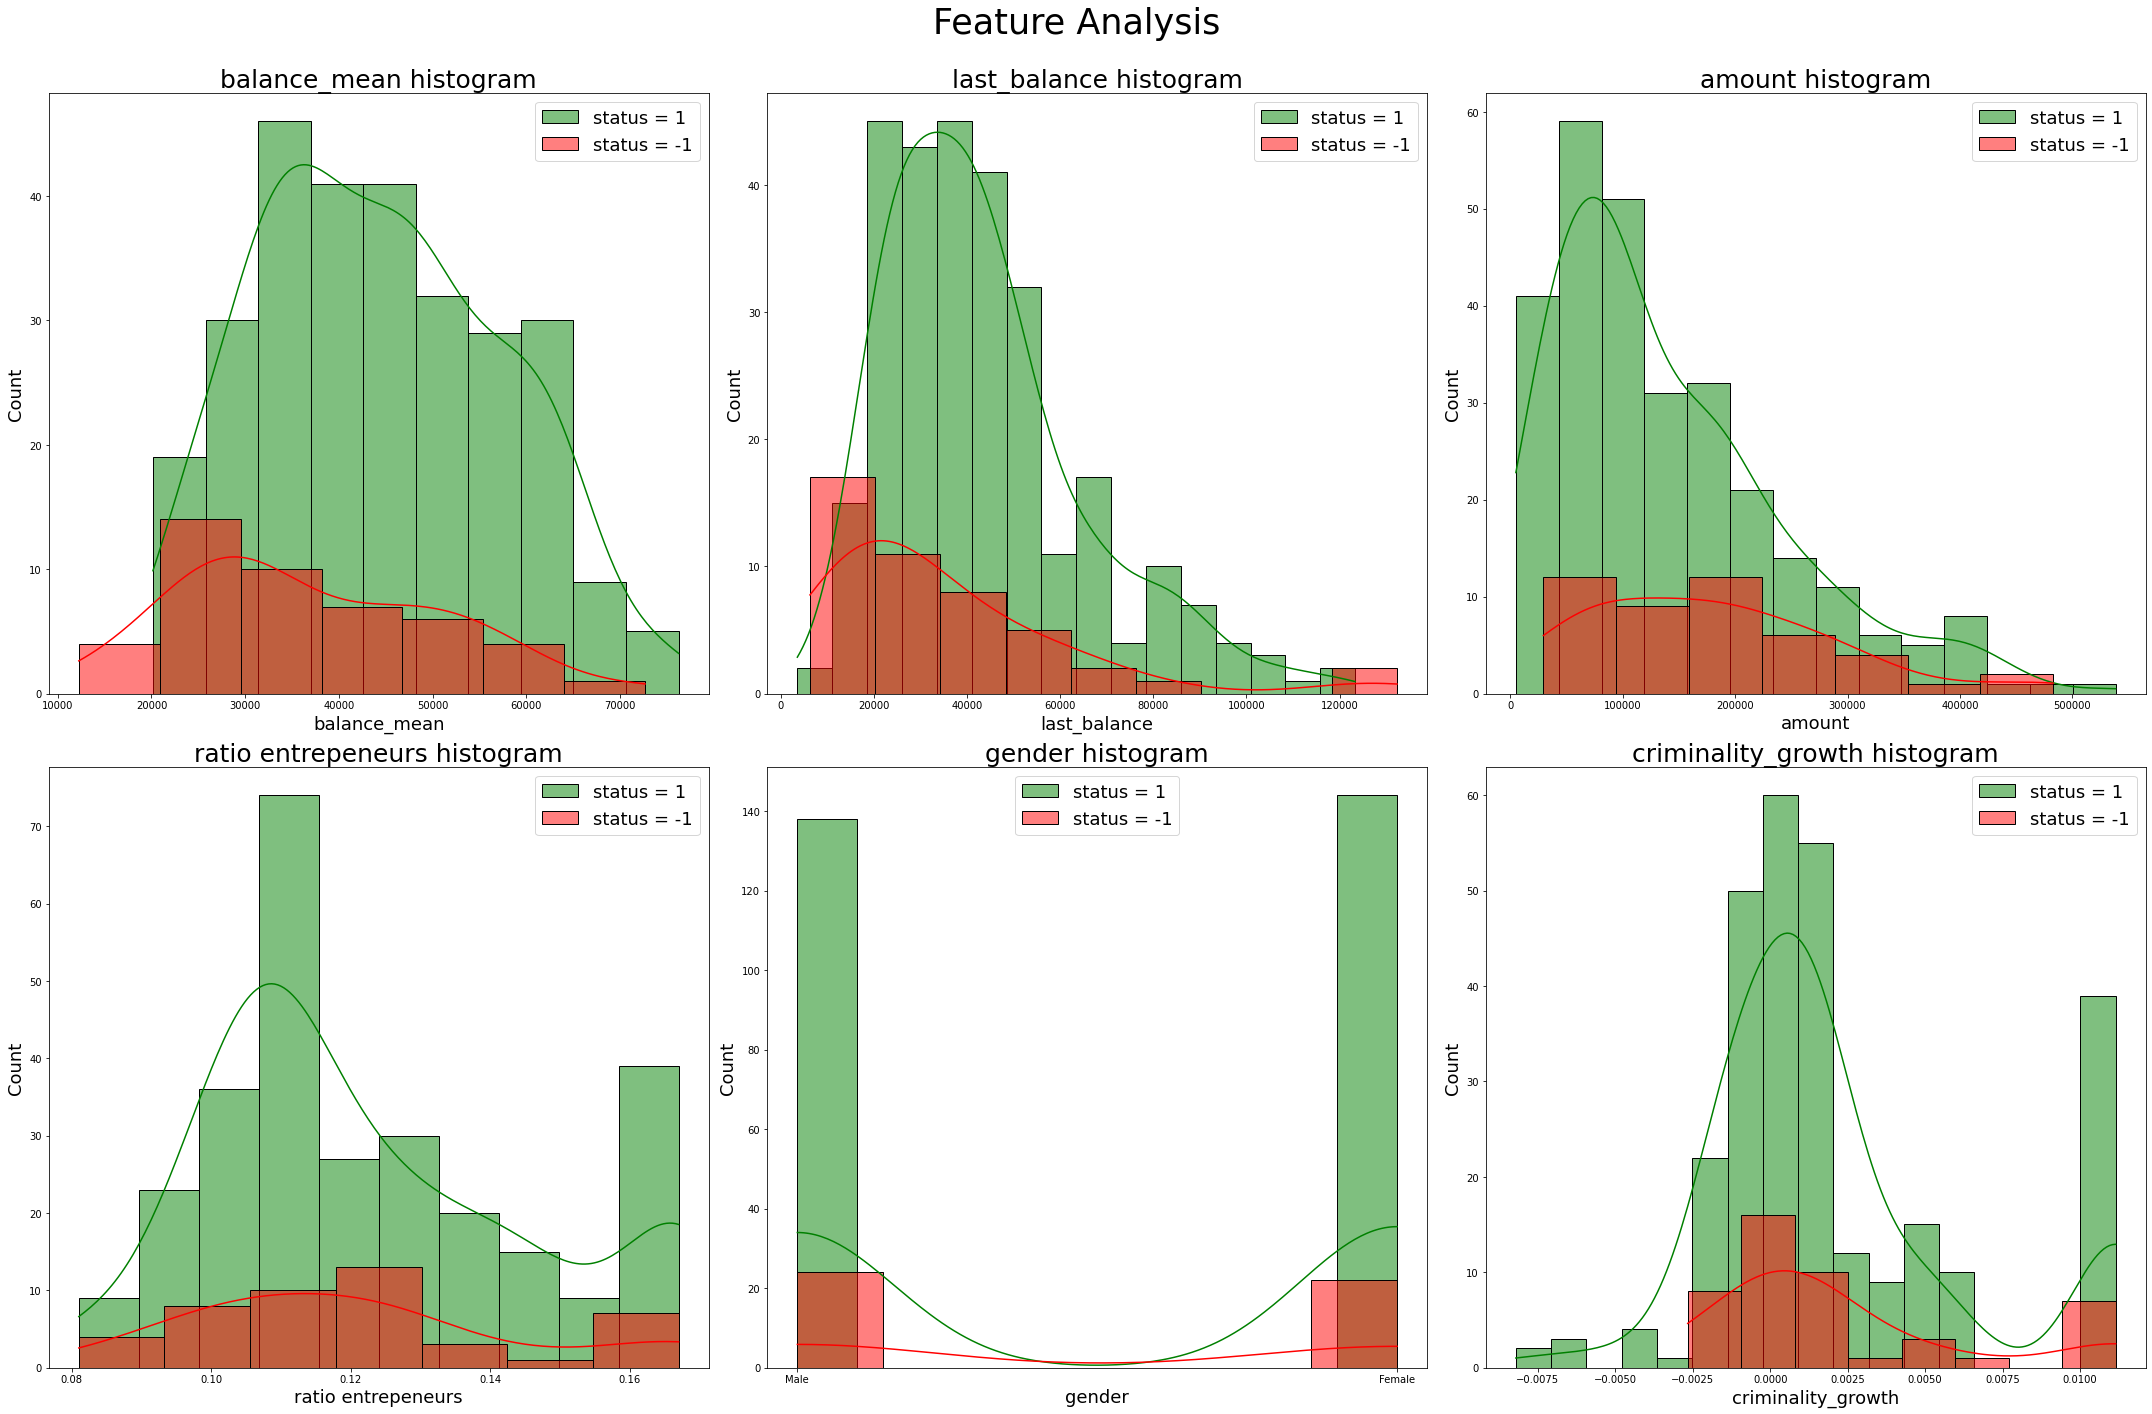

In [21]:

def get_feature_histogram(df, column, ax):
    loan = df[df.status==1]
    do_not_loan = df[df.status==-1]

    sns.histplot(loan[column], ax=ax, color='g', label = 'status = 1', kde=True)
    fig = sns.histplot(do_not_loan[column], ax=ax, color='r', label = 'status = -1', kde=True)

    if column == "gender":
        fig.set(xticks=[0, 1], xticklabels=["Male", "Female"])


# needs to have a len that is a perfect square
features_to_analyse = ["balance_mean", "last_balance", "amount", "ratio entrepeneurs", "gender", "criminality_growth"]

def get_features_histograms(df, columns, num_cols, num_rows):
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 20))
    column_index = 0

    for i in range(num_rows):
        for j in range(num_cols):
            get_feature_histogram(ax=axs[i, j], df=df, column=columns[column_index])
            axs[i, j].set_title(f"{columns[column_index]} histogram", fontsize=25)
            axs[i, j].legend(loc="best", fontsize=18)
            plt.rc('axes', labelsize=18)
            column_index += 1
    
    fig.suptitle('Feature Analysis', fontsize=35)
    fig.tight_layout()
    fig.subplots_adjust(top=0.92)
    plt.show()

merged_data_train = pd.read_csv("./preprocessed/mergedTrainData.csv")
get_features_histograms(df=merged_data_train, columns=features_to_analyse, num_cols=3, num_rows=2)


From these plots we can observe some interesting conclusions:
- Clients with lower account's balances are more prone to ask for loans.
- There are more loans with lower asked ammounts.
-  The criminality growth in a district and the gender have no influence on the success of the loan.